In [33]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

%matplotlib inline

This is a stripped file, using only the dates from the original data

In [34]:
file_path = r"D:\Study\Coding\Twitter\ESWB\sub_France.txt"
dummy_df = pd.read_csv(file_path, sep=";")

print(dummy_df .columns)


Index(['LN', 'TIME_EVENT', 'COUNTRY'], dtype='object')


In [35]:
dummy_df['Date'] = pd.to_datetime(dummy_df.TIME_EVENT.str[:10])
dummy_df.head()
#hail_france.info()

# df['New_Sample'] = df.Sample.str[:1]
# df['Date']= pd.to_datetime(df['Date'])

,LN,TIME_EVENT,COUNTRY,Date
0,23,14/10/2019 15:00,FR,2019-10-14
1,24,14/10/2019 14:00,FR,2019-10-14
2,228,18/08/2019 20:00,FR,2019-08-18
3,229,18/08/2019 19:00,FR,2019-08-18
4,230,18/08/2019 19:00,FR,2019-08-18


In [36]:
dummy_df_date = dummy_df['Date'].dt.date.value_counts().sort_index().reset_index()
dummy_df_date.columns = ['DATE','Count']
dummy_df_date['DATE'] = pd.to_datetime(dummy_df_date['DATE'], dayfirst=True)
dummy_df_date.head()
# hail_france_date.info()


,DATE,Count
0,2017-01-09,2
1,2017-02-05,1
2,2017-03-02,1
3,2017-03-23,6
4,2017-03-31,2


In [37]:
r = pd.date_range(start=dummy_df_date.DATE.min(), end=dummy_df_date.DATE.max())
dummy_df_date.set_index('DATE').reindex(r).fillna(0.0).rename_axis('DATE').reset_index()
dummy_df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    108 non-null    datetime64[ns]
 1   Count   108 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.8 KB


In [42]:
dummy_df_date = dummy_df_date.set_index(['DATE'])
dummy_df_date.index = pd.to_datetime(dummy_df_date.index, unit='d')
dummy_df_dateW = dummy_df_date.resample("W").sum()
dummy_df_dateW.reset_index(inplace=True)

In [43]:
dummy_df_dateW['week'] = dummy_df_dateW.index + 1
dummy_df_dateW.head()

,DATE,Count,week
0,2017-01-15,2,1
1,2017-01-22,0,2
2,2017-01-29,0,3
3,2017-02-05,1,4
4,2017-02-12,0,5


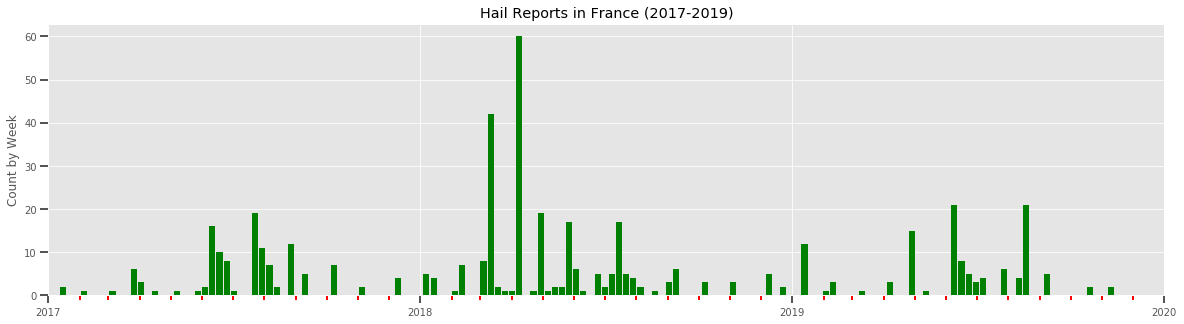

In [44]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(20,5))
#sns.barplot(x=hail_france_dateW.DATE,y='Count',data=hail_france_dateW)
ax.bar(dummy_df_dateW.DATE, dummy_df_dateW.Count,  width =6, color='green')

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

datemin = datetime.date(dummy_df_dateW.DATE.min().year, 1, 1)
datemax = datetime.date(dummy_df_dateW.DATE.max().year + 1, 1, 1)
ax.set_xlim(datemin, datemax)

ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')

ax.set_ylabel('Count by Week')
ax.set_title('Reports in France (2017-2019)')

ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=8)
ax.tick_params(which='minor', length=5, color='r')

ax.grid(True)

plt.show()